# data | **Lorenz accurate integration**

This notebook is used to generate a Lorenz attractor trajectory using a RK45 integrator, with higher precision requirement.

In [1]:
import numpy as np

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.integrate import solve_ivp

plt.rcParams['font.size'] = 12

do_savedata = True
path_savedata = './attractors/'

We generate a Lorenz system of parameters
$$\sigma = 10, \beta = 8/3 \;\;\text{and}\;\; \rho = 28,$$with initial condition $x_0 = \left[ -8, 8, 27\right]$.

In [2]:
dt = 0.001
duration = int(3000)
x0 = (-8, 8, 27)

def Lorenz_dynamics(t, x):
    dx = 10 * (x[1] - x[0])
    dy = 28 * x[0] - x[1] - x[0] * x[2]
    dz = x[0] * x[1] - (8/3)* x[2]
    return np.array([dx, dy, dz], float)

In [3]:
tt_simulate = np.arange(duration, step = dt)

# RK45 integration
sol = solve_ivp(Lorenz_dynamics, [0, duration], x0, t_eval=tt_simulate,
                rtol =1e-12, atol=np.ones(3)*1e-12)
xxn, yyn, zzn = sol.y[0,:], sol.y[1,:], sol.y[2,:]

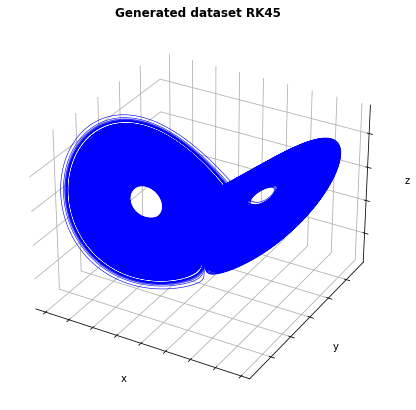

In [4]:
# plot
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot(xxn, yyn, zzn, lw=0.6, c = 'blue' )
plt.title('Generated dataset RK45', fontweight='bold')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xlabel('x');  ax.set_ylabel('y'); ax.set_zlabel('z');
fig.set_facecolor('w')
plt.setp(ax.get_xticklabels(), color="w")
plt.setp(ax.get_yticklabels(), color="w")
plt.setp(ax.get_zticklabels(), color="w")
plt.show()

In [5]:
if do_savedata:
    np.save(path_savedata + "Lorenz_ext{}".format(str(duration)),
            np.array([xxn, yyn, zzn]))
    print('saved')

saved


The file can be imported using
```python
x, y, z = np.load('Lorenz_extXXXX.npy')
```

<br>

### Compare with *Brunton et al* dataset

Since our target is to extend in time the dataset used by S. Brunton et al, we generate this dataset using their same precision requirements.

In this section we load thei dataset & plot it over our datset, to be sure that the trajectories match.

In [6]:
# load data from Lorenz attractor (Brunton)
xx, yy, zz = np.loadtxt('./sb2017/Lorenz_extended.csv', unpack=True)

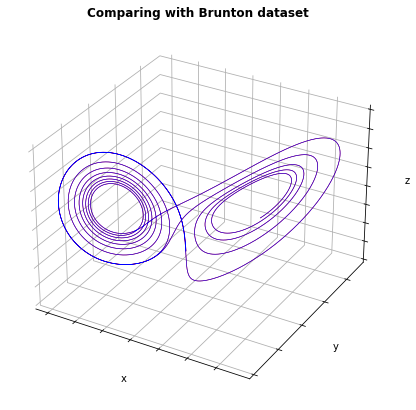

In [7]:
idx = np.arange(10000, 20000)

# plot
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot(xx[idx], yy[idx], zz[idx], lw=0.6, c = 'red' )
ax.plot(xxn[idx], yyn[idx], zzn[idx], lw=0.6, c = 'blue' )
plt.title('Comparing with Brunton dataset', fontweight='bold')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.set_xlabel('x');  ax.set_ylabel('y'); ax.set_zlabel('z');
fig.set_facecolor('w')
plt.setp(ax.get_xticklabels(), color="w")
plt.setp(ax.get_yticklabels(), color="w")
plt.setp(ax.get_zticklabels(), color="w")
plt.show()

***

Last review: 30 may 2022. <br>**Workgroup**: Barone Francesco, Nagaro Gianmarco, Ninni Daniele, Valentini Lorenzo.

University of Padua, **Laboratory of Computational Physics**, module B.